In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore")

In [3]:
dataset = pd.read_csv('/Users/mehrac/Desktop/DSA-Python/diabetes.csv')
df = dataset.copy()

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.isnull().sum().sum()


0

In [7]:
df.duplicated().sum()


0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df['Outcome'].value_counts()


Outcome
0    500
1    268
Name: count, dtype: int64

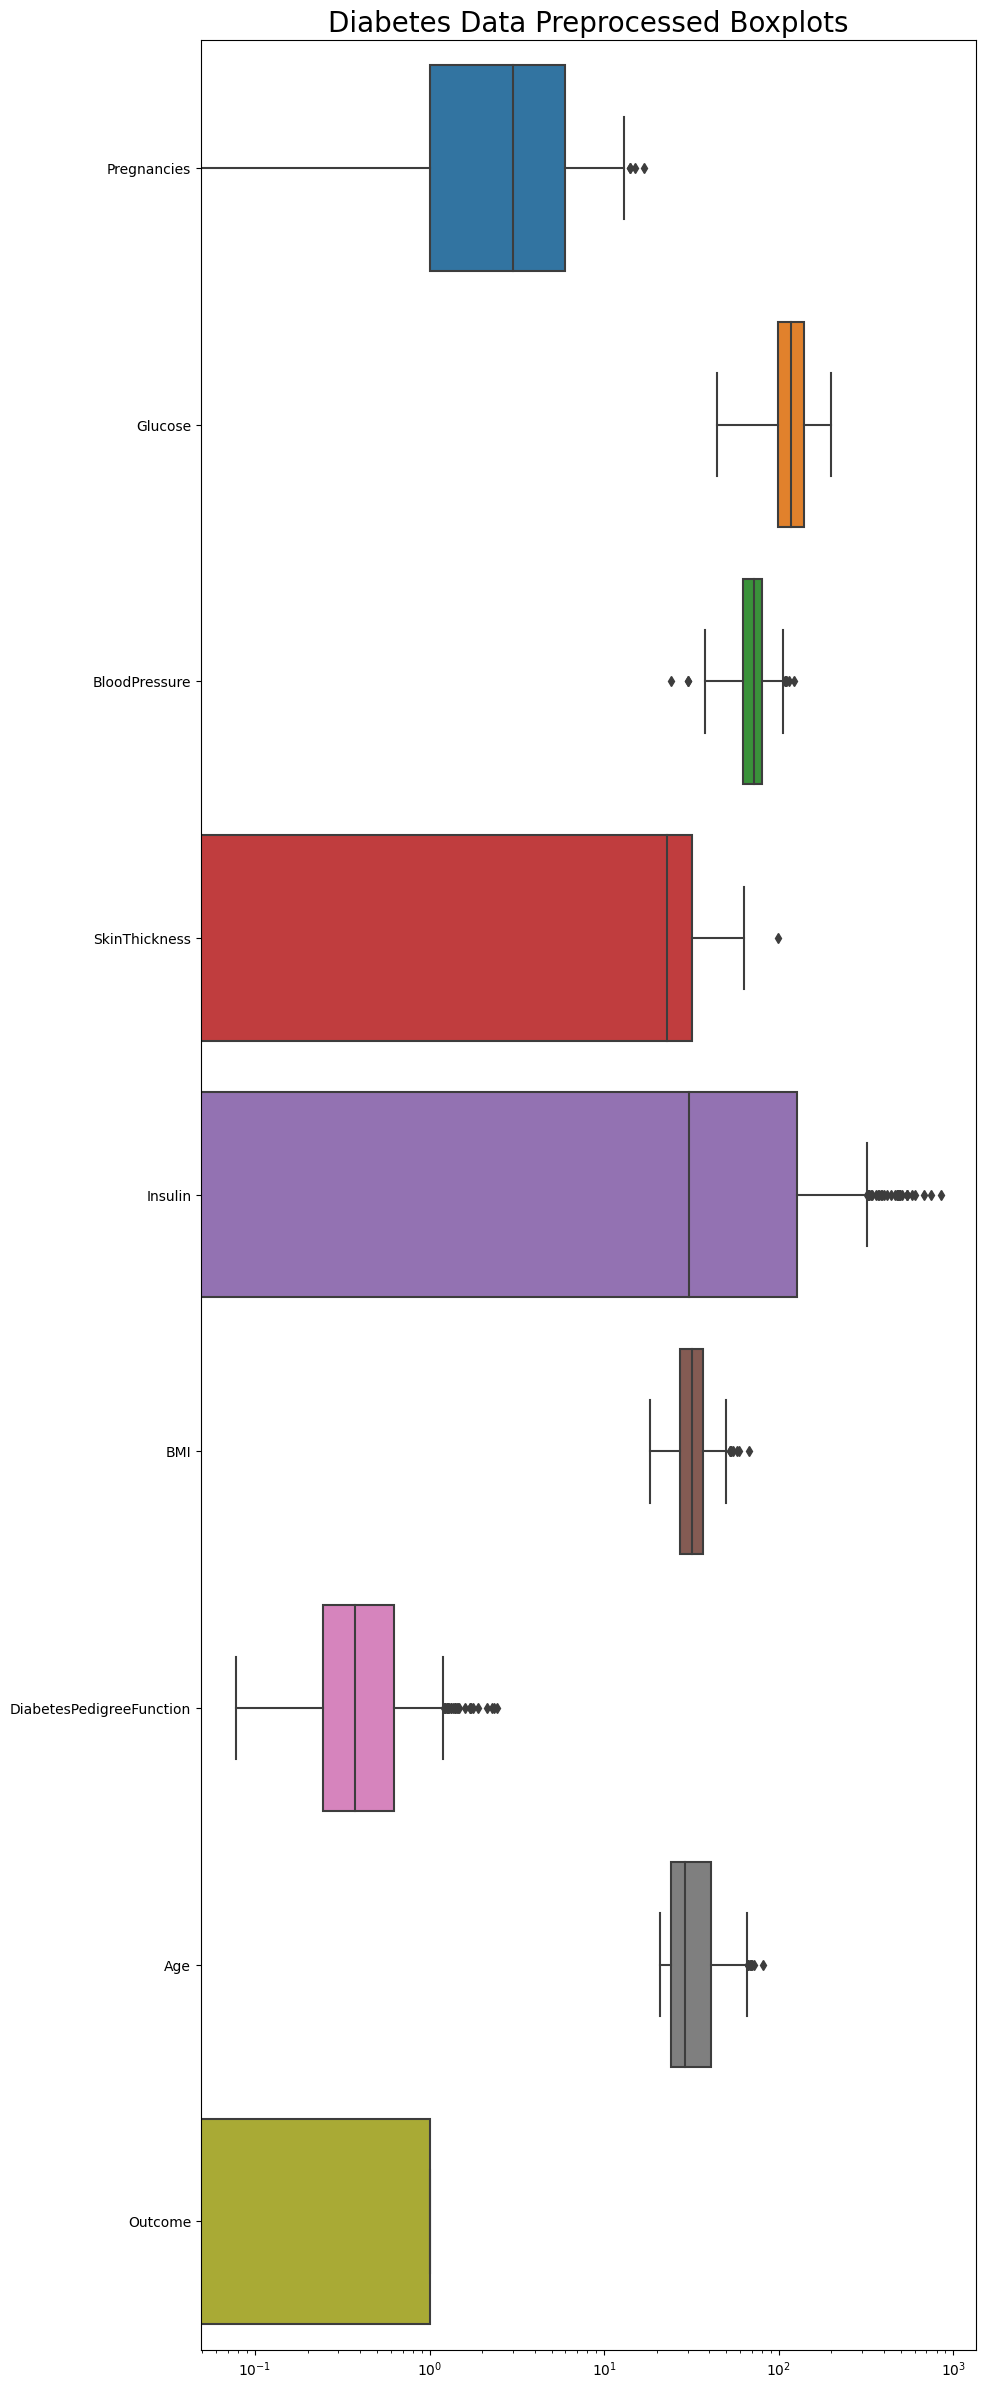

In [22]:
plt.figure(figsize = (10,30))
bx = sns.boxplot(data=df, orient="h")
bx.set_title('Diabetes Data Preprocessed Boxplots', fontsize=20)
bx.set(xscale='log')
plt.show()

In [11]:
X=df.iloc[:,:-1]
y =df.iloc[:,-1]
scaler= RobustScaler()
X.iloc[:,:] = scaler.fit_transform(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=1234, stratify=y)

Grid Search

In [13]:
xgbt = XGBClassifier()




xgbt_param = {'booster':['gblinear'], 
            'verbosity':[0],
            'eta':[0.1],
             'max_depth' :[2],
              'subsample':[0.1]
                 }

xgbt_grid = GridSearchCV(estimator=xgbt, 
                        param_grid=xgbt_param,
                        scoring='accuracy',
                        cv=10,
                        n_jobs=-1,
                        return_train_score=True)


xgbt_grid_fit = xgbt_grid.fit(X, y)

results_xgbt = pd.DataFrame.from_dict(xgbt_grid_fit.cv_results_)

xgbt_top_rank = results_xgbt[results_xgbt['rank_test_score'] == 1]

In [14]:
xgbt_top_rank.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_booster,param_eta,param_max_depth,param_subsample,param_verbosity,params,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.019778,0.001789,0.003724,0.0012,gblinear,0.1,2,0.1,0,"{'booster': 'gblinear', 'eta': 0.1, 'max_depth...",...,0.777135,0.778582,0.787265,0.782923,0.77424,0.777135,0.789017,0.774566,0.781105,0.005382


In [15]:
print(xgbt_top_rank['mean_test_score'])
print(xgbt_top_rank['mean_train_score'])


0    0.770882
Name: mean_test_score, dtype: float64
0    0.781105
Name: mean_train_score, dtype: float64


In [16]:
xgbt_grid_fit.best_params_


{'booster': 'gblinear',
 'eta': 0.1,
 'max_depth': 2,
 'subsample': 0.1,
 'verbosity': 0}

In [17]:
best_model = xgbt_grid_fit.best_estimator_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_matrix)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Confusion Matrix:
[[89 10]
 [25 30]]
Precision: 0.75
Recall: 0.5454545454545454
F1-Score: 0.631578947368421


Randomized Search

In [18]:
xgbt_param = {'booster':['gblinear'], 
            'verbosity':[0],
            'eta':[0.1],
             'max_depth' :[2],
              'subsample':[0.1]
                 }

xgbt_rs = RandomizedSearchCV(estimator=xgbt, 
                        param_distributions= xgbt_param,
                        scoring='accuracy',
                        cv=10,
                        n_iter=10,
                        return_train_score=True,
                        random_state=1234)

xgbt_rs_fit = xgbt_grid.fit(X, y)

results_xgbt_rs = pd.DataFrame.from_dict(xgbt_rs_fit.cv_results_)

xgbt_top_rank_rs = results_xgbt_rs[results_xgbt_rs['rank_test_score'] == 1]

In [19]:
xgbt_top_rank_rs.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_booster,param_eta,param_max_depth,param_subsample,param_verbosity,params,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.009187,0.00152,0.001405,0.000279,gblinear,0.1,2,0.1,0,"{'booster': 'gblinear', 'eta': 0.1, 'max_depth...",...,0.777135,0.778582,0.787265,0.782923,0.77424,0.777135,0.789017,0.774566,0.781105,0.005382


In [20]:
xgbt_rs_fit.best_params_


{'booster': 'gblinear',
 'eta': 0.1,
 'max_depth': 2,
 'subsample': 0.1,
 'verbosity': 0}